<a href="https://colab.research.google.com/github/rpazos98/aprendizaje_profundo/blob/master/PAZOS_RODRIGO_DL_Examen_AGOSTO_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

b. Utilizando SGD y pytorch.

### Resolución

In [1]:
def f(x,y):
  return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def fx(x, y):
  return 2*(1.5 - x + x*y)*(-1+y) + 2*(2.25 - x + x*y**2)*(-1+y**2) + 2*(2.625 - x + x*y**3)*(-1+y**3)

def fy(x, y):
  return 2*(1.5 - x + x*y)*(x) + 2*(2.25 - x + x*y**2)*(2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)

x = 0
y = 0
a = 0.03
iters = 10000

for i in range(iters):
  x1 = x - a*fx(x, y)
  y1 = y - a*fy(x, y)
  x = x1
  y = y1

print("Mínimo valor:", f(x,y))
print("Punto de mínimo:", (x,y))

Mínimo valor: 7.896312771987667e-29
Punto de mínimo: (2.999999999999978, 0.49999999999999445)


In [2]:
import torch
from torch.autograd import Variable

x = Variable(torch.tensor([0.0]), requires_grad=True)
y = Variable(torch.tensor([0.0]), requires_grad=True)

for _ in range(iters):
    loss = f(x, y)
    loss.backward()

    x.data -= a * x.grad
    y.data -= a * y.grad

    x.grad.zero_()
    y.grad.zero_()

minimum_value = f(x, y).item()
minimum_point = (x.item(), y.item())

print("Mínimo valor:", minimum_value)
print("Punto de mínimo:", minimum_point)

Mínimo valor: 2.2525092902014876e-11
Punto de mínimo: (2.999988079071045, 0.4999970495700836)


## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?






### Resolución

In [60]:
import torch.nn as nn


# A)
conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=2, stride=1)
conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0, stride=1)
activation = nn.Tanh()
pooling = nn.MaxPool2d(kernel_size=5, padding=0, stride=5)

x = torch.rand(3,720,1024)
print(x.shape)

x = conv1(x)
print(x.shape)

x = conv2(x)
print(x.shape)

x = activation(x)
print(x.shape)

x = pooling(x)
print(x.shape)

torch.Size([3, 720, 1024])
torch.Size([16, 718, 1022])
torch.Size([32, 714, 1018])
torch.Size([32, 714, 1018])
torch.Size([32, 142, 203])


La salida final tiene las siguientes dimensiones: torch.Size([32, 142, 203]). Tiene 32 canales de salida y es de 203x142

In [61]:
# B)

fc = nn.Linear(in_features = 32*142*203, out_features=3)

x = x.view(-1)
print(x.shape)

x = fc(x)
print(x.shape)

torch.Size([922432])
torch.Size([3])


La capa fully connected debe tener de entrada 922432 features de entrada y 3 de salida.

## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

### Resolución

h1(0) y h2(0) son los estados ocultos iniciales

**t=1**

Estado oculto h1 en el tiempo t=1:
$$h1(1)=wxh1⋅x(1)+wh1h1⋅h1(0)+wh2h1⋅h2(0)+bh1$$

Estado oculto h2 en el tiempo t=1:
$$h2(1)=wxh2⋅x(1)+wh2h2⋅h2(0)+wh1h2⋅h1(0)+bh2$$

Salida en el tiempo t=1:
$$y(1)=wh1y⋅h1(1)+wh2y⋅h2(1)+by$$

**t=2**

Estado oculto h1 en el tiempo t=2:
$$h1(2)=wxh1⋅x(2)+wh1h1⋅h1(1)+wh2h1⋅h2(1)+bh1$$

Estado oculto h2 en el tiempo t=2:
$$h2(2)=wxh2⋅x(2)+wh2h2⋅h2(1)+wh1h2⋅h1(1)+bh2$$

Salida en el tiempo t=2:
$$y(2)=wh1y⋅h1(2)+wh2y⋅h2(2)+by$$

**t=3**

Estado oculto h1 en el tiempo t=3:
$$h1(3)=wxh1⋅x(3)+wh1h1⋅h1(2)+wh2h1⋅h2(2)+bh1$$

Estado oculto h2 en el tiempo t=3:
$$h2(3)=wxh2⋅x(3)+wh2h2⋅h2(2)+wh1h2⋅h1(2)+bh2$$

Salida en el tiempo t=3:
$$y(3)=wh1y⋅h1(3)+wh2y⋅h2(3)+by$$

## Ejercicio 4



Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.
- d) Compare el score de cada modelo.



### Resolución

#### Analisis y limpieza de datos

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from sklearn import metrics
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset_black_sales.csv")

df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.select_dtypes(include=['object']).columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [9]:
df.select_dtypes(include=['number']).columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


Todas las variables son categoricas, excepto por Purchase, aunque eventualmente es necesario transformarla en una variable categorica.

In [11]:
nan_counts = df.isna().sum()
nan_counts[nan_counts > 0]

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

Como la cantidad de columnas con Nans es significativa se imputa con 0

In [12]:
column_fill_values = {'Product_Category_2': 0, 'Product_Category_3': 0}
no_nan_df = df.fillna(column_fill_values)

In [13]:
nan_counts = no_nan_df.isna().sum()
nan_counts[nan_counts > 0]

Series([], dtype: int64)

Una primera aproximacion para asignarle valores numericos a las variables categoricas es usar one hot encoding para Gender y un numeric mapping para City_Category, Age, Stay_In_Current_City_Years, de forma de reflejar la relacion categorica de cada una de las categorias dentro de las features.

In [14]:
encoded_df = pd.get_dummies(no_nan_df, columns=['Gender'])

In [15]:
stay_mapping = {'0': 0, '1': 1, '2': 2, '3':3, '4+':4}
age_mapping = {'0-17':0, '18-25':1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
city_category_mapping = {'A': 0, 'B': 1, 'C':2}

encoded_df['City_Category_numeric'] = df['City_Category'].replace(city_category_mapping)
encoded_df['Age_numeric'] = df['Age'].replace(age_mapping)
encoded_df['Stay_In_Current_City_Years_numeric'] = df['Stay_In_Current_City_Years'].replace(stay_mapping)

clean_df = encoded_df.drop(columns=["City_Category", "Age", "Stay_In_Current_City_Years"])

In [16]:
clean_df.select_dtypes(include=['object']).columns

Index(['Product_ID'], dtype='object')

In [17]:
clean_df.select_dtypes(include=['number']).columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F',
       'Gender_M', 'City_Category_numeric', 'Age_numeric',
       'Stay_In_Current_City_Years_numeric'],
      dtype='object')

Se aplica la logica para que la variable objetivo sea binaria

In [18]:
clean_df["Purchase_label"] = clean_df["Purchase"].apply(lambda x:0 if x<=9000 else 1)
final_df = clean_df.drop(columns=["Purchase"])

In [19]:
final_df

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_numeric,Age_numeric,Stay_In_Current_City_Years_numeric,Purchase_label
0,1000001,P00069042,10,0,3,0.0,0.0,1,0,0,0,2,0
1,1000001,P00248942,10,0,1,6.0,14.0,1,0,0,0,2,1
2,1000001,P00087842,10,0,12,0.0,0.0,1,0,0,0,2,0
3,1000001,P00085442,10,0,12,14.0,0.0,1,0,0,0,2,0
4,1000002,P00285442,16,0,8,0.0,0.0,0,1,2,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,0.0,0.0,0,1,1,5,1,0
550064,1006035,P00375436,1,0,20,0.0,0.0,1,0,2,2,3,0
550065,1006036,P00375436,15,1,20,0.0,0.0,1,0,1,2,4,0
550066,1006038,P00375436,1,0,20,0.0,0.0,1,0,2,6,2,0


In [20]:
first_excericse_df = final_df.drop(columns=["User_ID", "Product_ID"])

In [21]:
first_excericse_df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_numeric,Age_numeric,Stay_In_Current_City_Years_numeric,Purchase_label
0,10,0,3,0.0,0.0,1,0,0,0,2,0
1,10,0,1,6.0,14.0,1,0,0,0,2,1
2,10,0,12,0.0,0.0,1,0,0,0,2,0
3,10,0,12,14.0,0.0,1,0,0,0,2,0
4,16,0,8,0.0,0.0,0,1,2,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,0.0,0.0,0,1,1,5,1,0
550064,1,0,20,0.0,0.0,1,0,2,2,3,0
550065,15,1,20,0.0,0.0,1,0,1,2,4,0
550066,1,0,20,0.0,0.0,1,0,2,6,2,0


### Entrenamiento de modelos

El código utlizado para el entrenamiento y el diseño de las arquitecturas está basado en el [código de la Clase 4 de Embeddings](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/blob/master/clase_4/jupyter_notebooks/Clase4_Embeddings.ipynb) de esta materia.

#### Sin embeddings

In [22]:
y = first_excericse_df["Purchase_label"].to_numpy()
X = first_excericse_df.drop(columns=["Purchase_label"]).to_numpy()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train[0]

array([14.,  0.,  1.,  2.,  0.,  0.,  1.,  1.,  1.,  3.])

In [25]:
n_train = len(X_train)
n_test= len(X_test)

In [27]:
class MyDataset(Dataset):

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [28]:
train_ds = MyDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_ds = MyDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))

In [29]:
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
test_dataloader = DataLoader(test_ds, batch_size=64)

In [30]:
class NNet(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=10, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x):
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [31]:
nnet = NNet()

In [32]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

In [33]:
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

device

'cuda:0'

In [34]:
nnet = nnet.to(device)

In [35]:
epochs = 40

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

for epoch in range(epochs):

  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []

  for i,data in enumerate(train_dataloader):
    x_batch, y_batch = data
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    loss = loss_function(nnet_output, y_batch)

    loss.backward()

    optimizer.step()

    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    epoch_loss = epoch_loss + loss.item()

  epoch_loss = epoch_loss / n_train
  train_loss_by_epoch.append(epoch_loss)
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(test_dataloader):
    x_batch, y_batch = data
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    loss = loss_function(nnet_output, y_batch)

    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    valid_epoch_loss = valid_epoch_loss + loss.item()

  valid_epoch_loss = valid_epoch_loss / n_test
  valid_loss_by_epoch.append(valid_epoch_loss)
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.391 / 0.373 | Train/Valid accuracy: 0.825 / 0.834
 Epoch 1 | Train/Valid loss: 0.365 / 0.367 | Train/Valid accuracy: 0.837 / 0.833
 Epoch 2 | Train/Valid loss: 0.377 / 0.381 | Train/Valid accuracy: 0.833 / 0.833
 Epoch 3 | Train/Valid loss: 0.378 / 0.378 | Train/Valid accuracy: 0.833 / 0.833
 Epoch 4 | Train/Valid loss: 0.378 / 0.378 | Train/Valid accuracy: 0.833 / 0.833
 Epoch 5 | Train/Valid loss: 0.377 / 0.378 | Train/Valid accuracy: 0.834 / 0.833
 Epoch 6 | Train/Valid loss: 0.377 / 0.377 | Train/Valid accuracy: 0.834 / 0.833
 Epoch 7 | Train/Valid loss: 0.377 / 0.376 | Train/Valid accuracy: 0.834 / 0.833
 Epoch 8 | Train/Valid loss: 0.376 / 0.379 | Train/Valid accuracy: 0.834 / 0.833
 Epoch 9 | Train/Valid loss: 0.377 / 0.396 | Train/Valid accuracy: 0.834 / 0.832
 Epoch 10 | Train/Valid loss: 0.377 / 0.378 | Train/Valid accuracy: 0.834 / 0.833
 Epoch 11 | Train/Valid loss: 0.377 / 0.377 | Train/Valid accuracy: 0.834 / 0.833
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

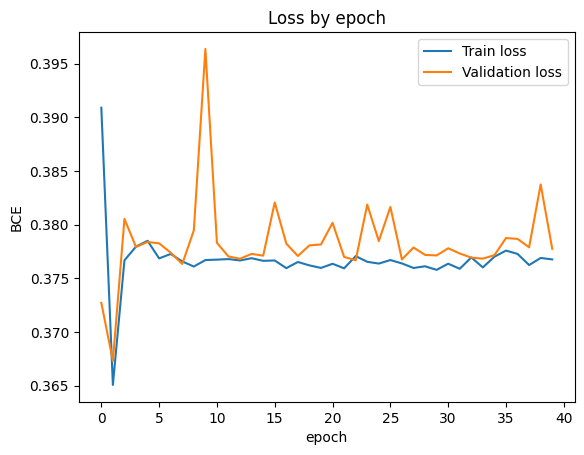

In [36]:
import matplotlib.pyplot as plt

fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

Se puede observar que hay una mejora significativa en la pérdida (loss) durante los primeros epochs. Sin embargo, posteriormente, el modelo parece quedarse atrapado en un mínimo local con una pérdida mayor que la que se encontró en el epoch 1, y no puede salir de ese estado. Los pocos momentos en los que parece haber sobreajuste, identificado por una diferencia significativa entre la pérdida de entrenamiento y la de validación, son corregidos adecuadamente en el siguiente epoch.

Se realizaron algunas pruebas con un algoritmo StepLR para ajustar la tasa de aprendizaje a lo largo del proceso de entrenamiento y evitar que el proceso quede atrapado en el aparente mínimo local. Sin embargo, estas pruebas no arrojaron mejores resultados.

Para realizar más pruebas sería necesario contar con acceso a una GPU y un entorno menos volátil que Colab.

#### Con embeddings

In [37]:
user_id = df['User_ID']
product_id = df['Product_ID']

In [38]:
user_encoder = {user: idx for idx, user in enumerate(user_id.unique())}
product_encoder = {product: idx for idx, product in enumerate(product_id.unique())}

In [39]:
second_exercise_df = final_df.copy()

second_exercise_df['User_ID'] = df['User_ID'].replace(user_encoder)
second_exercise_df['Product_ID'] = df['Product_ID'].replace(product_encoder)

second_exercise_df

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_numeric,Age_numeric,Stay_In_Current_City_Years_numeric,Purchase_label
0,0,0,10,0,3,0.0,0.0,1,0,0,0,2,0
1,0,1,10,0,1,6.0,14.0,1,0,0,0,2,1
2,0,2,10,0,12,0.0,0.0,1,0,0,0,2,0
3,0,3,10,0,12,14.0,0.0,1,0,0,0,2,0
4,1,4,16,0,8,0.0,0.0,0,1,2,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5325,3627,13,1,20,0.0,0.0,0,1,1,5,1,0
550064,5327,3626,1,0,20,0.0,0.0,1,0,2,2,3,0
550065,5328,3626,15,1,20,0.0,0.0,1,0,1,2,4,0
550066,5878,3626,1,0,20,0.0,0.0,1,0,2,6,2,0


In [40]:
second_exercise_df

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_numeric,Age_numeric,Stay_In_Current_City_Years_numeric,Purchase_label
0,0,0,10,0,3,0.0,0.0,1,0,0,0,2,0
1,0,1,10,0,1,6.0,14.0,1,0,0,0,2,1
2,0,2,10,0,12,0.0,0.0,1,0,0,0,2,0
3,0,3,10,0,12,14.0,0.0,1,0,0,0,2,0
4,1,4,16,0,8,0.0,0.0,0,1,2,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5325,3627,13,1,20,0.0,0.0,0,1,1,5,1,0
550064,5327,3626,1,0,20,0.0,0.0,1,0,2,2,3,0
550065,5328,3626,15,1,20,0.0,0.0,1,0,1,2,4,0
550066,5878,3626,1,0,20,0.0,0.0,1,0,2,6,2,0


In [41]:
y = second_exercise_df["Purchase_label"]
X = second_exercise_df.drop(columns=["Purchase_label"])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
X_train_user_idx = X_train["User_ID"].to_numpy()
X_train_product_idx = X_train["Product_ID"].to_numpy()

X_test_user_idx = X_test["User_ID"].to_numpy()
X_test_product_idx = X_test["Product_ID"].to_numpy()

X_train = X_train.drop(columns=["User_ID", "Product_ID"]).to_numpy()
X_test = X_test.drop(columns=["User_ID", "Product_ID"]).to_numpy()

y_test = y_test.to_numpy()

In [44]:
class MyDatasetWithEmbddings(Dataset):

  def __init__(self, x, user_idx, product_idx, y):
    self.x = x
    self.product_idx = product_idx
    self.user_idx = user_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.user_idx[idx], self.product_idx[idx], self.y[idx]

In [45]:
train_ds = MyDatasetWithEmbddings(torch.FloatTensor(X_train), X_train_user_idx, X_train_product_idx, torch.FloatTensor(y_train))
test_ds = MyDatasetWithEmbddings(torch.FloatTensor(X_test), X_test_user_idx, X_test_product_idx, torch.FloatTensor(y_test))

In [46]:
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
test_dataloader = DataLoader(test_ds, batch_size=64)

In [47]:
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.user_embeddings = torch.nn.Embedding(num_embeddings=5891, embedding_dim=8)
    self.product_embeddings = torch.nn.Embedding(num_embeddings=3631, embedding_dim=8)
    self.linear_1 = torch.nn.Linear(in_features=8 * 2 + 10, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x, user_idx, produdct_idx):
    user_embeds = self.user_embeddings(user_idx)
    product_embeds = self.product_embeddings(produdct_idx)
    x = torch.cat([x, user_embeds, product_embeds], dim=1)
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [48]:
nnnetWithEmbeddings = NNetWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

In [49]:
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.001, weight_decay=0.01)

In [50]:
epochs = 40

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

for epoch in range(epochs):

  nnnetWithEmbeddings.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []

  for i,data in enumerate(train_dataloader):
    x_batch, user_embed_batch, produdct_embed_batch, y_batch = data
    x_batch = x_batch.to(device).float()
    user_embed_batch = user_embed_batch.to(device).int()
    produdct_embed_batch = produdct_embed_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    optimizer.zero_grad()
    nnet_output = nnnetWithEmbeddings(x_batch, user_embed_batch, produdct_embed_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    loss = loss_function(nnet_output, y_batch)

    loss.backward()

    optimizer.step()

    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    epoch_loss = epoch_loss + loss.item()

  epoch_loss = epoch_loss / n_train
  train_loss_by_epoch.append(epoch_loss)
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  nnnetWithEmbeddings.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(test_dataloader):
    x_batch, user_embed_batch, produdct_embed_batch, y_batch = data
    x_batch = x_batch.to(device).float()
    user_embed_batch = user_embed_batch.to(device).int()
    produdct_embed_batch = produdct_embed_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    nnet_output = nnnetWithEmbeddings(x_batch, user_embed_batch, produdct_embed_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    loss = loss_function(nnet_output, y_batch)

    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    valid_epoch_loss = valid_epoch_loss + loss.item()

  valid_epoch_loss = valid_epoch_loss / n_test
  valid_loss_by_epoch.append(valid_epoch_loss)
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.350 / 0.284 | Train/Valid accuracy: 0.847 / 0.874
 Epoch 1 | Train/Valid loss: 0.273 / 0.273 | Train/Valid accuracy: 0.878 / 0.878
 Epoch 2 | Train/Valid loss: 0.265 / 0.269 | Train/Valid accuracy: 0.881 / 0.880
 Epoch 3 | Train/Valid loss: 0.261 / 0.268 | Train/Valid accuracy: 0.883 / 0.879
 Epoch 4 | Train/Valid loss: 0.259 / 0.266 | Train/Valid accuracy: 0.884 / 0.881
 Epoch 5 | Train/Valid loss: 0.257 / 0.267 | Train/Valid accuracy: 0.884 / 0.881
 Epoch 6 | Train/Valid loss: 0.257 / 0.264 | Train/Valid accuracy: 0.885 / 0.882
 Epoch 7 | Train/Valid loss: 0.255 / 0.264 | Train/Valid accuracy: 0.886 / 0.882
 Epoch 8 | Train/Valid loss: 0.255 / 0.264 | Train/Valid accuracy: 0.886 / 0.881
 Epoch 9 | Train/Valid loss: 0.254 / 0.268 | Train/Valid accuracy: 0.886 / 0.880
 Epoch 10 | Train/Valid loss: 0.254 / 0.266 | Train/Valid accuracy: 0.886 / 0.882
 Epoch 11 | Train/Valid loss: 0.253 / 0.268 | Train/Valid accuracy: 0.886 / 0.879
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

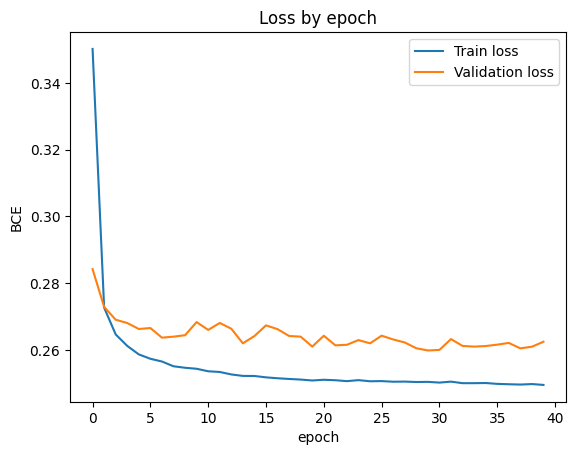

In [51]:
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

El par de curvas de pérdida para el modelo con embeddings muestra una tendencia de mejora constante en función del conjunto de datos de entrenamiento, hasta alcanzar un mínimo en los últimos 11 epochs. Al mismo tiempo, logra una ligera mejora en la pérdida para el conjunto de datos de validación. Desde los primeros epochs, los valores ya eran relativamente buenos.

La diferencia de pérdida entre los dos conjuntos de datos es menor que en el modelo anterior, y consistentemente obtiene valores mejores desde los primeros epochs. Esta consistente mejora a lo largo de las epochs tambien es valiosa: no es solo que el sistema no parece estar sobreajustando, sino que ademas mejora a lo largo del entrenamiento. Eso mismo no es cierto para el modelo anterior.

Es evidente que los embeddings logran capturar una relación entre los usuarios y los productos con cuanto van a gastar que confiere una ventaja significativa al modelo en comparación con el modelo sin embeddings. Probablemente logra capturar la tendencia de consumo de cada cliente y el valor del los productos (que se puede asumir que no es un valor fijo porque al ser un evento con muchas promociones debe ser considerablemente variable a lo largo del tiempo).

El resultado final en terminos de accuracy para el validation dataset es de **0.883 para el modelo con embeddings** y **0.833 para el modelo sin embeddings**. Esto refleja claramente la mejora significativa que proveen los embeddings a la capacidad predictiva del sistema.